In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Exercício 1

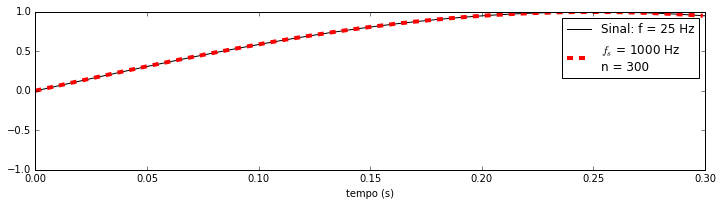

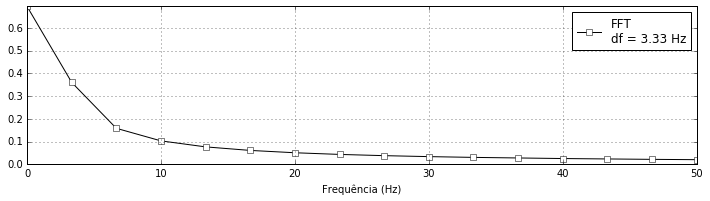

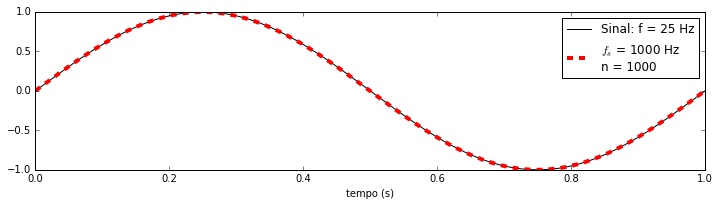

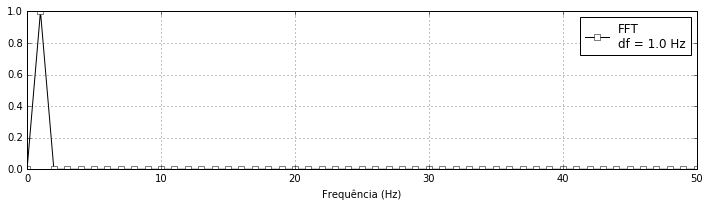

In [25]:
# Seno puro
fs = [(1000,300), (1000,1000)]#, (1000,2000), (2000,2000)]
      #(3,1000), (3,2000), (0.3,1000),(0.3,2000)]
for i,k in fs:
    ll = r'$f_s$ = ' + str(i) + ' Hz\nn = ' + str(k)
    tt = np.arange(0,k/i,1/i)
    yy = np.sin(2*np.pi*(tt+np.random.rand(1)/i))
    t = np.linspace(0,k/i,1e6*k/i)
    y = np.sin(2*np.pi*t)
    Y = np.fft.fft(yy)
    Y = 2 * Y/len(Y)
    Y[0] = Y[0]/2
    freq = np.fft.fftfreq(len(Y),d=1/i)
    df = freq[1]-freq[0]
    ss = 'FFT\ndf = ' + str(round(df,2)) + ' Hz'
    
    plt.figure(figsize=(12,4/np.sqrt(2)))
    plt.plot(t,y,'k',label='Sinal: f = 25 Hz')
    plt.xlabel('tempo (s)')
    plt.plot(tt,yy,'r--',linewidth=4.00,label=ll,ms=4)
    plt.axis([0,k/i,-1,1])
    plt.legend(numpoints=1,loc='best')
    
    plt.figure(figsize=(12,4/np.sqrt(2)))
    plt.plot(freq[0:int(len(Y)/2)],np.abs(Y[0:int(len(Y)/2)]),
             'ks-',mec='k',mfc="w",label=ss)
    plt.xlabel('Frequência (Hz)')
    plt.axis([0,50,0,max(abs(Y))])
    plt.legend(numpoints=1)
    plt.grid('on')

## Exercício 3

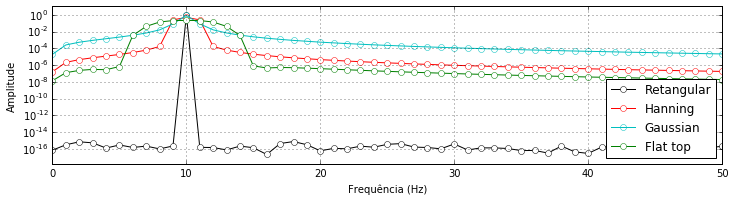

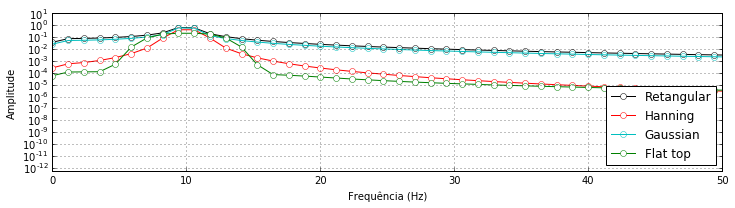

In [6]:
fs = [(1000,1000),(1000,850)]
for i,k in fs:
    ll = r'$f_s$ = ' + str(i) + ' Hz\nn = ' + str(k)
    tt = np.arange(0,k/i,1/i)
    yy = np.sin(2*np.pi*10*tt)
    t = np.linspace(0,k/i,1e6*k/i)
    y = np.sin(2*np.pi*10*t)
    # retangular
    Y = np.fft.fft(yy)
    Y = 2 * Y / len(Y)
    Y[0] = Y[0] / 2
    # hanning
    h = signal.hanning(len(yy))
    Y_h = 2 * np.fft.fft(yy*h)/len(Y)
    Y_h[0] = Y_h[0] / 2
    # gaussiana
    g = signal.gaussian(len(yy),std=500)
    Y_g = 2 * np.fft.fft(yy*g)/len(Y)
    Y_g[0] = Y_g[0] / 2
    # flat top
    ft = signal.flattop(len(yy))
    Y_f = 2 * np.fft.fft(yy*ft)/len(Y)
    Y_f[0] = Y_f[0] / 2
    # frequências
    freq = np.fft.fftfreq(len(Y),d=1/i)
    
    # figuras
    plt.figure(figsize=(12,4/np.sqrt(2)))
    plt.semilogy(freq[0:int(len(Y)/2)],np.abs(Y[0:int(len(Y)/2)]),
                 'ko-',mfc="w",mec='k',label='Retangular')
    plt.semilogy(freq[0:int(len(Y)/2)],np.abs(Y_h[0:int(len(Y)/2)]),
                 'ro-',mfc="w",mec='r',label='Hanning')
    plt.semilogy(freq[0:int(len(Y)/2)],np.abs(Y_g[0:int(len(Y)/2)]),
                 'co-',mfc="w",mec='c',label='Gaussian')
    plt.semilogy(freq[0:int(len(Y)/2)],np.abs(Y_f[0:int(len(Y)/2)]),
                 'go-',mfc="w",mec='g',label='Flat top')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Amplitude')
    plt.axis([0,50,min(min(abs(Y)),min(abs(Y_h))),1e1])
    plt.legend(numpoints=1,loc='lower right')
    plt.grid('on')

## Exercício 4

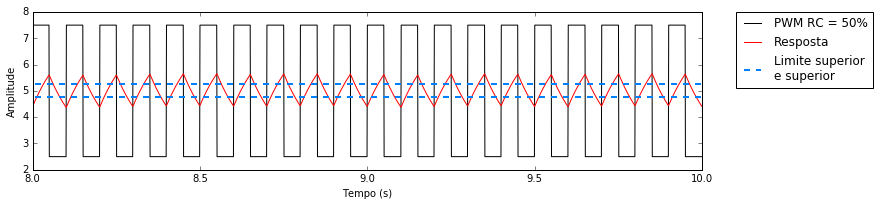

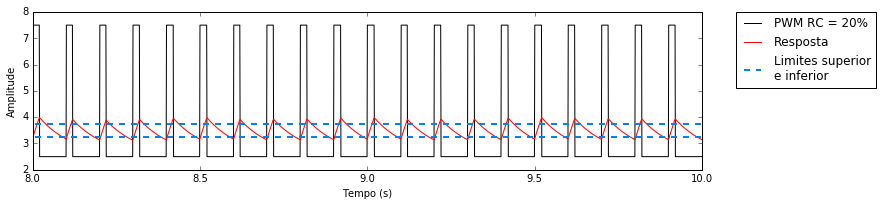

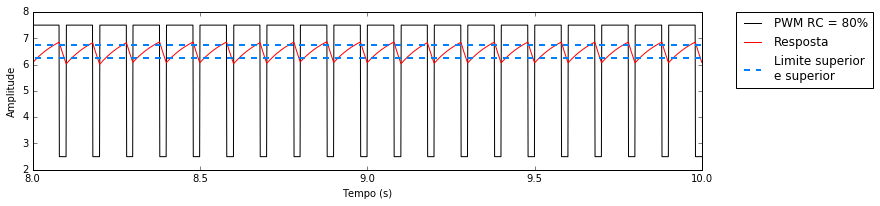

In [90]:
t = np.arange(0,10,0.001)
tau = 100e-3
tf = signal.TransferFunction([1],[tau,1])
u1 = 2.5 * signal.square(2*np.pi*10*t,duty=0.5) + 5
resp1 = signal.lsim2(tf,U=u1,T=t,X0=0.5)
u2 = 2.5 * signal.square(2*np.pi*10*t,duty=0.2) + 5
resp2 = signal.lsim2(tf,U=u2,T=t,X0=0.5)
u3 = 2.5 * signal.square(2*np.pi*10*t,duty=0.8) + 5
resp3 = signal.lsim2(tf,U=u3,T=t,X0=0.5)

plt.figure(figsize = (12,4/np.sqrt(2)))
plt.plot(t,u1,'k',label='PWM RC = 50%')
plt.plot(resp1[0],resp1[1],'r',label='Resposta')
plt.plot([0,10],[5.25,5.25],'--',color='#007FFF',
         linewidth=2,label='Limite superior\ne superior')
plt.plot([0,10],[4.75,4.75],'--',color='#007FFF',
         linewidth=2)
plt.ylabel('Amplitude')
plt.xlabel('Tempo (s)')
plt.axis([8,10,2,8])
plt.legend(bbox_to_anchor=(1.05, 1),
           loc=2, borderaxespad=0.)

plt.figure(figsize = (12,4/np.sqrt(2)))
plt.plot(t,u2,'k',label='PWM RC = 20%')
plt.plot(resp2[0],resp2[1],'r',label='Resposta')
plt.plot([0,10],[3.75,3.75],'--',color='#007FFF',
         linewidth=2,label='Limites superior\ne inferior')
plt.plot([0,10],[3.25,3.25],'--',color='#007FFF',
         linewidth=2)
plt.ylabel('Amplitude')
plt.xlabel('Tempo (s)')
plt.axis([8,10,2,8])
plt.legend(bbox_to_anchor=(1.05, 1),
           loc=2, borderaxespad=0.)

plt.figure(figsize = (12,4/np.sqrt(2)))
plt.plot(t,u3,'k',label='PWM RC = 80%')
plt.plot(resp3[0],resp3[1],'r',label='Resposta')
plt.plot([0,10],[6.75,6.75],'--',color='#007FFF',
         linewidth=2,label='Limite superior\ne superior')
plt.plot([0,10],[6.25,6.25],'--',color='#007FFF',
         linewidth=2)
plt.ylabel('Amplitude')
plt.xlabel('Tempo (s)')
plt.axis([8,10,2,8])
plt.legend(bbox_to_anchor=(1.05, 1),
           loc=2, borderaxespad=0.)

/home/julionaojulho/.local/lib/python3.5/site-packages/ipykernel/__main__.py:44: RuntimeWarning: divide by zero encountered in log10


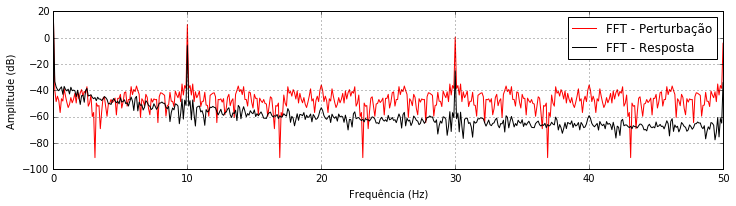

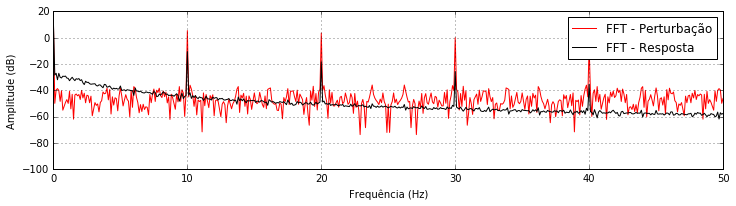

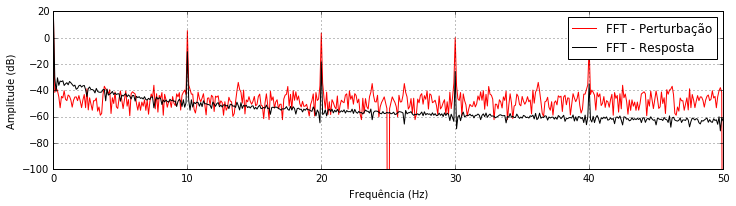

In [92]:
U1 = np.fft.fft(u1)
U1 = 2 * U1 / len(U1)
U1[0] = U1[0] / 2
U2 = np.fft.fft(u2)
U2 = 2 * U2 / len(U2)
U2[0] = U2[0] / 2
U3 = np.fft.fft(u3)
U3 = 2 * U3 / len(U3)
U3[0] = U3[0] / 2
ufreq = np.fft.fftfreq(len(U1),d=0.001)
Resp1 = np.fft.fft(resp1[1])
Resp1 = 2 * Resp1 / len(Resp1)
Resp1[0] = Resp1[0] / 2

Resp2 = 2 * np.fft.fft(resp2[1]) / len(Resp1)
Resp2[0] = Resp2[0] / 2

Resp3 = 2 * np.fft.fft(resp3[1]) / len(Resp1)
Resp3[0] = Resp3[0] / 2

plt.figure(figsize = (12,4/np.sqrt(2)))
plt.plot(ufreq[0:int(len(U1)/2)],20*np.log10(abs(U1[0:int(len(U1)/2)])),'r-',
         label='FFT - Perturbação')
plt.plot(ufreq[0:int(len(U1)/2)],20*np.log10(abs(Resp1[0:int(len(U1)/2)])),'k-',
         mfc='w',label='FFT - Resposta')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (dB)')
plt.axis([0,50,-100,20])
plt.legend(numpoints=1)
plt.grid('on')

plt.figure(figsize = (12,4/np.sqrt(2)))
plt.plot(ufreq[0:int(len(U1)/2)],20*np.log10(abs(U2[0:int(len(U1)/2)])),'r-',
         label='FFT - Perturbação')
plt.plot(ufreq[0:int(len(U1)/2)],20*np.log10(abs(Resp2[0:int(len(U1)/2)])),'k-',
         mfc='w',label='FFT - Resposta')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (dB)')
plt.axis([0,50,-100,20])
plt.legend(numpoints=1)
plt.grid('on')

plt.figure(figsize = (12,4/np.sqrt(2)))
plt.plot(ufreq[0:int(len(U1)/2)],20*np.log10(abs(U3[0:int(len(U1)/2)])),'r-',
         label='FFT - Perturbação')
plt.plot(ufreq[0:int(len(U1)/2)],20*np.log10(abs(Resp3[0:int(len(U1)/2)])),'k-',
         mfc='w',label='FFT - Resposta')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (dB)')
plt.axis([0,50,-100,20])
plt.legend(numpoints=1)
plt.grid('on')

## Exercício 5

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


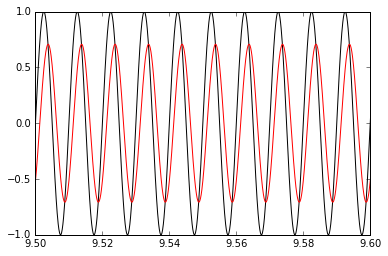

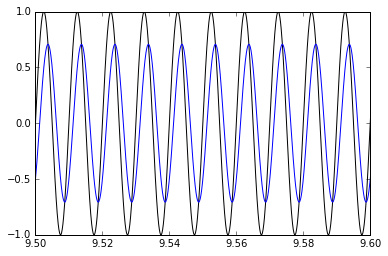

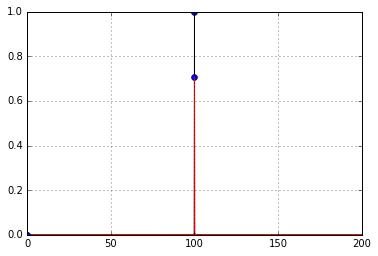

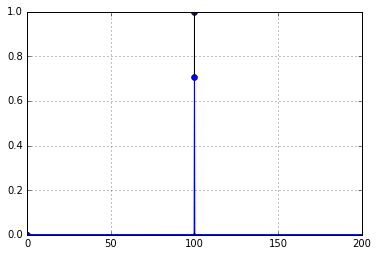

In [204]:
fs = 10e3
t = np.linspace(0,10,10*fs)
y = np.sin(2*np.pi*100*t)
fc = 100
tau = 1 / (100 * 2 * np.pi)

a = np.exp(-1/(fs * tau))
u = np.sin(2*np.pi*100*t)
y = np.zeros(len(u))

#tf
tf = signal.TransferFunction([1],[tau,1])
resp = signal.lsim2(tf,U=u,T=t)

for i,yy in enumerate(y):
    if i != 0:
        y[i] = a * y[i-1] + (1-a) * u[i-1]
    else:
        y[i] = y[i]

plt.figure()
plt.plot(t,u,'k')
plt.plot(t,y,'r')
plt.axis([9.5,9.6,-1,1])
plt.figure()
plt.plot(t,u,'k')
plt.plot(resp[0],resp[1],'b')
plt.axis([9.5,9.6,-1,1])

# espectros
U = np.fft.fft(u[1000:])
U = 2 * U / len(U)
U[0] = U[0] / 2
ufreq = np.fft.fftfreq(len(U),d=1/fs)
Y = 2 * np.fft.fft(y[1000:]) / len(U)
Y[0] = Y[0] / 2
Resp = 2 * np.fft.fft(resp[1][1000:]) / len(U)
Resp[0] = Resp[0] / 2

plt.figure()
plt.plot(ufreq[0:int(len(U)/2)],(abs(U[0:int(len(U)/2)])),'k-')
plt.plot(ufreq[0:int(len(U)/2)],(abs(Y[0:int(len(U)/2)])),'r-')
plt.stem([0,100],[0,max(abs(U[0:int(len(U)/2)]))],'k')
plt.stem([0,100],[0,max(abs(Y[0:int(len(U)/2)]))],'r')
plt.axis([0,200,0,1])
plt.legend()
plt.grid('on')

plt.figure()
plt.plot(ufreq[0:int(len(U)/2)],(abs(U[0:int(len(U)/2)])),'k-')
plt.plot(ufreq[0:int(len(U)/2)],(abs(Resp[0:int(len(U)/2)])),'b-')
plt.stem([0,100],[0,max(abs(U[0:int(len(U)/2)]))],'k')
plt.stem([0,100],[0,max(abs(Resp[0:int(len(U)/2)]))],'b')
plt.axis([0,200,0,1])
plt.legend()
plt.grid('on')

In [193]:
max(y)/max(u),max(resp[1])/max(u),max(abs(Y))/max(abs(U)),max(abs(Resp))/max(abs(U))

(0.75624852099126572,
 0.75582904357215352,
 0.70722331299854324,
 0.70688421412036817)